# The building blocks

## Figures and Axes

There are two important concepts to understand in MatPlotLib:
- **[Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure):** You can see this as the container of all the axes, texts, labels, etc
- **[Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes):** The axes is the bounding box with ticks and labels and will eventually contain the plot itself

In the example below we created a single figure with two subplots (instances of the maplotlib.axes.Axes class).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

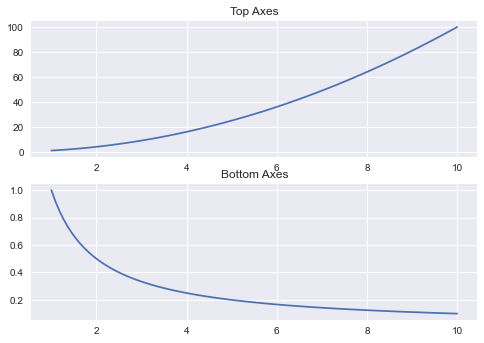

In [2]:
fig, axs = plt.subplots(2, 1)
x = np.linspace(1, 10, 100)
axs[0].plot(x, x**2)
axs[0].set_title("Top Axes")
axs[1].plot(x, 1/x)
axs[1].set_title("Bottom Axes");

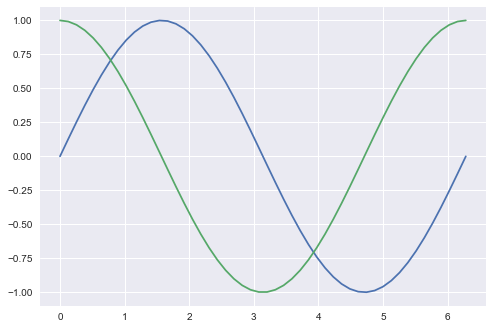

In [3]:
x = np.linspace(0, 2 * np.pi, 50)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

# Customizing your Plots

The plot function supports many optional keyword arguments that allow you to heavily customize the plot.

## Line style and color

You can change the style, color of the line and the markers of every point. These can be configured separately, but can also be combined into one argument.

### Color

You can change the color of the line by using the `color` or `c` keyword. Colors can be in various formats:

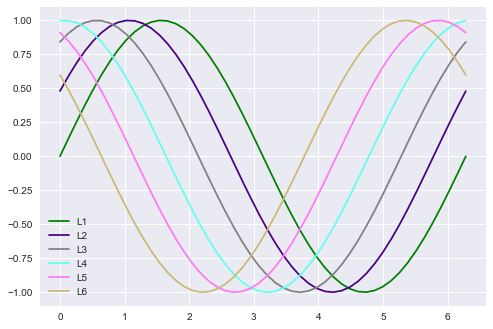

In [4]:
plt.plot(x, np.sin(x), c='g', label='L1')  # Short code (rgbcmykw)
plt.plot(x, np.sin(x + 0.5), c='indigo', label="L2")  # Color name (html names are supported as well)
plt.plot(x, np.sin(x + 1.0), c='0.5', label="L3")  # Grayscale between 0 and 1
plt.plot(x, np.sin(x + 1.5), c=(0.38, 1.00, 0.94), label="L4")  # (R, G, B[, A])
plt.plot(x, np.sin(x + 2.0), c='#ff78f6', label="L5")  # "#RRGGBB[AA]"
plt.plot(x, np.sin(x + 2.5), c='C4', label="L6")  # Cn
plt.legend();

### Line Style

The linestyle can be changed through the keyword argument `linestyle` or `ls` for short.
The width of the line can also be adjusted through the keyword `linewidth` or `lw` for short.

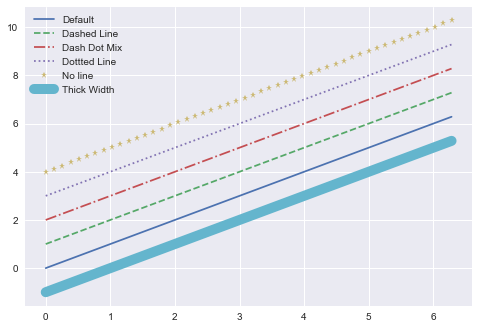

In [5]:
plt.plot(x, x, ls='-', label='Default')
plt.plot(x, x + 1, ls='--', label='Dashed Line')
plt.plot(x, x + 2, ls='-.', label="Dash Dot Mix")
plt.plot(x, x + 3, ls=':', label='Dottted Line')
plt.plot(x, x + 4, ls='', marker='*', label="No line")  # Hides the line, custom marker to show the points plotted

plt.plot(x, x - 1, lw=10, label="Thick Width")
plt.legend();

### Markers

You can also change the marker of each point in the plot through the argument `marker`. This will become more useful once we cover scatter plots.
You can also costumize various parts of the markers, such as:

| Property | Short | Description | Type |
| :-------- | :-----: | :----------- | :----: |
| `markeredgecolor` | `mec` | Edge color | color |
| `markeredgewidth` | `mew` | Edge width | float |
| `markerfacecolor` | `mfc` | Face color | color |
| `markerfacecoloralt` | `mfcalt` | Face Color Alt | color |
| `markersize` | `ms` | Marker Size | float |

To easily see all the available markers, we recommend you check out the official [matplotlib cheatsheet](https://github.com/matplotlib/cheatsheets).

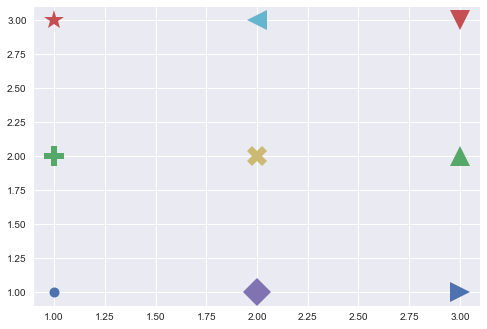

In [6]:
plt.plot([1], [1], marker='.', ms='20')
plt.plot([1], [2], marker='P', ms='20')
plt.plot([1], [3], marker='*', ms='20')
plt.plot([2], [1], marker='D', ms='20')
plt.plot([2], [2], marker='X', ms='20')
plt.plot([2], [3], marker='<', ms='20')
plt.plot([3], [1], marker='>', ms='20')
plt.plot([3], [2], marker='^', ms='20')
plt.plot([3], [3], marker='v', ms='20');

Another very interesting property is `markevery`. This allows you to customize how frequently markers should be shown.

| Syntax | Description |
| -----: | :---------- |
| None | Every point will be plotted |
| N | Every N-th marker starting with marker 0 |
| (start, N) | Every N-th marker, starting at marker Start |
| slice([start, end, N) | Every N-th marker from Start to End (exlusive) |
| [a, b, c, ...] | Only markers at points a, b, c, ... |
| [True, False, ...] | Only markers that are True |
| 0.1 | (float value) Markers will be spaced at approximately equal distances along the line, the distance along the line between markers is determined by multiplying the display-coordinate distance of the axes bounding-box diagonal by the value |
| (0.5, 0.1) | (a length-2 tuple of float) The same functionality as every=0.1 is exhibited but the first marker will be 0.5 multiplied by the display-coordinate-diagonal-distance along the line |

This allows you to create some interesting effects:

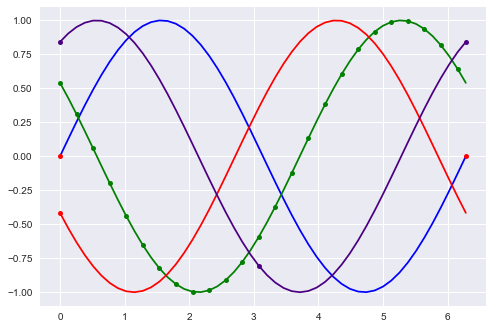

In [7]:
plt.plot(x, np.sin(x), marker='.', ms=10, mfc='r', markevery=[0, -1], c='b')  # Just like slicing, negative indexes work
plt.plot(x, np.cos(x + 1), marker='.', ms=10, markevery=2, c='g')  # Note the difference between 2 (an integer)
plt.plot(x, np.cos(x + 2), marker='.', ms=10, markevery=2.0, c='r')  # and 2.0 (a float)
plt.plot(x, np.sin(x + 1), marker='.', ms=10, markevery=[0, 24, -1], c='indigo');  # Knowing we have 50 equidistant points, we can plot start, middle and end

### Shortest of shorthands

You can combine all three of `color`, `marker` and `linestyle` into a single argument, which the documentation calls `fmt`. This can be costumized for every line plotted. Look at these call signatures:
- plot([x], y, [fmt], *, data=None, **kwargs)
- plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

In these examples we have only used one set of lines per call of `plt.plot()`. But we can specify multiple sets of `x`, `y` and `fmt` strings at once. The keyword arguments however, apply to all sets.
The x argument is optional, as such, it's default value is the numbers from 0 to N (length of y).

However, what they gain in convenience lose in ambiguity. For example:

'b'    # blue markers with default shape
'or'   # red circles
'-g'   # green solid line
'--'   # dashed line with default color
'^k:'  # black triangle_up markers connected by a dotted line

| `fmt` string | Result |
| :----------: | :----- |
| 'b' | Blue markers with default shape |
| 'or' | Red circles |
| '-g' | Green solid line |
| '--' | Dashed line with default color |
| '^k' | Black triangle_up markers connected by a dotted line |
| indigo | Indigo solid line (when only the color is present, any of the color formats is valid) |

# Adjusting the Axes limits

While Matplotlib usually chooses a good adjustment for the plot, there are cases where finer adjustments are required. For example, plotting a function that grows into infinity is enough to throw off the Axes' limits. Another possible use case is when the data set is extremely large but we want to focus exclusively on part of the plot.

***Disambiguation:*** A very common mistake is to confuse the `Axes` and `axis`. Axes is the class that contains the axis of the plot. 

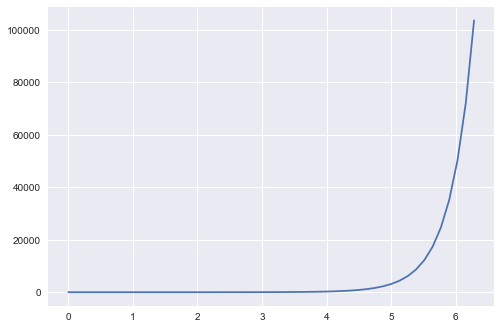

In [8]:
plt.plot(x, x**x);

This can be achieved through `xlim` and `ylim`, which receive the upper and lower bound for each axis. If you wanted to reverse an axis you can simply reorder the arguments.

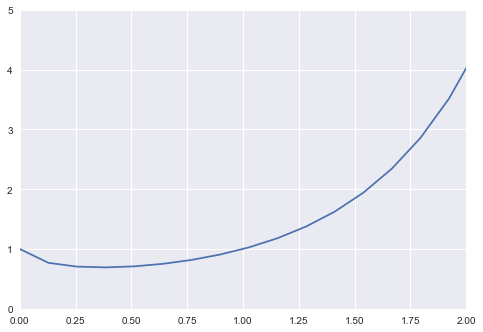

In [9]:
plt.plot(x, x**x)
plt.xlim(0, 2)
plt.ylim(0, 5);

There is another method to achieved this result called `axis`. This method receives either a list with four arguments or a string:
- The list must be formatted as such: `[xmin, xmax, ymin, ymax]`
- The string can represent various things, although some of the most useful ones are
    - `tight` Sets limits just large enough to show all data, then disables further autoscaling
    - `equal` Sets equal scaling, this is, garantees an equal aspect ratio
    - `auto` Revert to the default scaling

You can check all the possible values through the [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html#matplotlib.pyplot.axis) or by using the magic `plt.axis?`

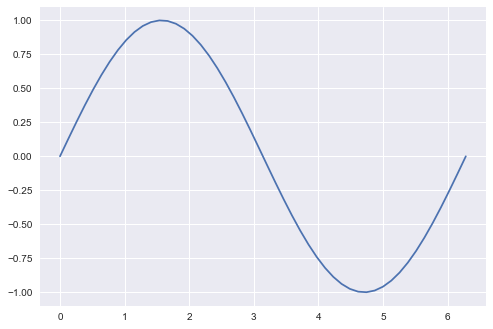

In [10]:
plt.plot(x, np.sin(x))
plt.axis('auto');

# Labeling

As we have used previously, you can label lines and also name Axes. When plotting data, the keyword `label` can be used to give a name to the line. By later calling `plt.legend()`, matplotlib will display a legend of all the lines present. To give a title, the aptly named `plt.title()` function receives the title to be displayed as a string.

*Note:* When plotting multiple lines with the same `plt.plot()` call, they will all have the same keyword arguments applied. As such, they will all share the same name.

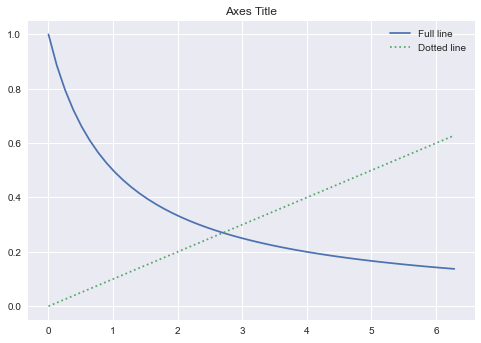

In [11]:
plt.plot(x, 1 / (x + 1), label="Full line")
plt.plot(x, x / 10, ':', label="Dotted line")
plt.title("Axes Title")
plt.legend();

# Matlab vs Object Oriented strikes back

One of the most confusing aspects of matplotlib can be switching between these two programming styles, even more so when crawling the web searching for StackOverflow posts to guide us on our journey.
As such, one way to peacefully transition from matlab to object oriented is to consider that we've changing *attributes* of either the Figure or Axes implicitly. As such, methods as `plt.title()` become `Axes.set_title()` and `plt.xlabel()` become `plt.set_xlabel()`.

Thankfully there is a much simpler way, using the `Axes.set()` method.

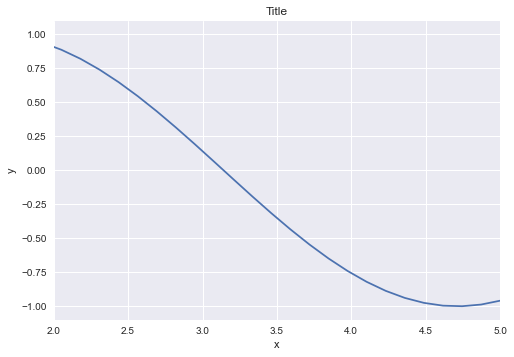

In [12]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(x, np.sin(x))
ax.set_title("Title")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(2, 5);

There is another way to use some of these setters in a single method: `Axes.set()`. It receives the properties you want to change as keywords, so you could do the same operations shown above in a more concise way.

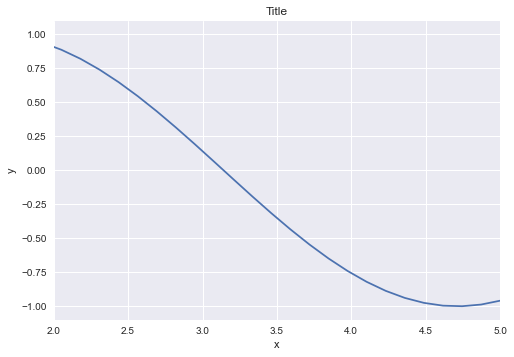

In [13]:
ax.set(title="Title", xlabel="x", ylabel="y", xlim=(2, 5))
fig

However, given the lack of documentation of this method, we must recommend some caution when trying to use it.